In [ ]:
import pandas as pd
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('/content/Averaged.csv')

In [ ]:
df.drop(['TEAM'], axis = 1)

,GP,W,L,WINP,MIN,PTS,FGM,FGA,FGP,3PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,POS/NEG
0,10.333333,5.333333,5.000000,0.448000,48.300000,107.900000,37.566667,85.733333,43.766667,12.166667,...,35.200000,44.800000,21.666667,13.900000,6.333333,5.200000,5.233333,21.366667,22.133333,-2.533333
1,7.000000,2.666667,4.333333,0.261000,48.133333,109.900000,38.466667,89.633333,42.966667,13.366667,...,32.833333,42.433333,22.533333,13.433333,6.566667,4.033333,5.900000,21.766667,21.766667,-8.400000
2,14.333333,6.666667,7.666667,0.458000,48.900000,110.433333,40.266667,88.300000,45.700000,12.200000,...,32.633333,43.966667,23.800000,11.633333,6.000000,4.300000,4.533333,21.366667,21.433333,-1.966667
3,4.000000,0.000000,4.000000,0.000000,48.000000,98.000000,37.500000,96.800000,38.800000,11.000000,...,31.500000,42.300000,23.000000,10.500000,7.300000,4.000000,8.800000,24.300000,20.000000,-23.800000
4,22.000000,14.000000,8.000000,0.636000,48.500000,114.100000,41.100000,86.100000,47.700000,12.200000,...,33.200000,43.300000,28.400000,14.900000,7.400000,5.700000,3.900000,23.200000,22.300000,3.400000
5,11.500000,5.500000,6.000000,0.481000,48.450000,108.100000,37.300000,84.800000,44.000000,16.250000,...,32.750000,40.850000,19.800000,14.600000,8.800000,4.300000,4.750000,21.900000,20.050000,2.000000
6,4.000000,0.000000,4.000000,0.000000,48.000000,96.300000,35.000000,81.900000,42.800000,11.000000,...,31.550000,38.400000,21.650000,13.650000,8.800000,4.500000,3.650000,21.650000,17.650000,-9.000000
7,12.666667,6.333333,6.333333,0.465667,48.133333,113.433333,39.933333,85.833333,46.600000,12.466667,...,32.366667,41.800000,22.433333,12.900000,7.433333,3.766667,4.766667,22.466667,23.133333,-0.500000
8,16.000000,10.333300,5.666667,0.621000,48.533333,111.400000,40.666667,88.833333,45.766667,12.433333,...,38.400000,49.200000,24.033333,13.533333,7.233333,4.933333,4.033333,20.500000,21.533333,5.033333
9,6.000000,2.000000,4.000000,0.314500,48.350000,104.600000,37.250000,85.700000,43.500000,11.200000,...,36.950000,46.550000,20.250000,16.100000,5.950000,4.700000,4.850000,20.650000,23.200000,-6.100000


In [ ]:
TargetVariable=['WINP']
Predictors=['GP','W','L','WINP','MIN','PTS','FGM','FGA','FGP','3PM','3PA',
            '3PP','FTM','FTA','FTP','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','POS/NEG']
 
X=df[Predictors].values
y=df[TargetVariable].values

In [ ]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
test_percentage = float(input("Please enter the test size you want: "))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=752)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Please enter the test size you want: 0.3
(16, 26)
(16, 1)
(7, 26)
(7, 1)


In [ ]:
y=df[TargetVariable].values
print(y)

x=df[Predictors].values
print(x)

[[0.448     ]
 [0.261     ]
 [0.458     ]
 [0.        ]
 [0.636     ]
 [0.481     ]
 [0.        ]
 [0.46566667]
 [0.621     ]
 [0.3145    ]
 [0.2       ]
 [0.38866667]
 [0.34433333]
 [0.429     ]
 [0.6515    ]
 [0.39133333]
 [0.381     ]
 [0.5475    ]
 [0.3335    ]
 [0.556     ]
 [0.2       ]
 [0.2       ]
 [0.636     ]]
[[ 10.33333333   5.33333333   5.           0.448       48.3
  107.9         37.56666667  85.73333333  43.76666667  12.16666667
   35.33333333  34.46666667  20.6         25.26666667  81.46666667
    9.6         35.2         44.8         21.66666667  13.9
    6.33333333   5.2          5.23333333  21.36666667  22.13333333
   -2.53333333]
 [  7.           2.66666667   4.33333333   0.261       48.13333333
  109.9         38.46666667  89.63333333  42.96666667  13.36666667
   38.53333333  34.76666667  19.66666667  24.66666667  80.
    9.6         32.83333333  42.43333333  22.53333333  13.43333333
    6.56666667   4.03333333   5.9         21.76666667  21.76666667
   -8.4      

In [ ]:
print("Would you like to use a Scaler in order to optimize your variables? (Y/N)")
response = input()


Would you like to use a Scaler in order to optimize your variables? (Y/N)
Y


In [ ]:
print("Creation of the Artificial Neural Network begins here..")
print("Would you like to choose the number of neurans and their equation type? (Y/N) ")

response = input()

if response == 'Y':
    print("Enter number of neurons: ")
    neurons = int(input())

    print("What activation style would you like for the first layer? ")
    print("1. ReLU Activation Function")
    print("2. Sigmoid/Logistic Activation Function")
    print("3. Hyperbolic Tangent")

    selection = int(input())

    if selection == 1:
        activation = 'relu'
    if selection == 2:
        activation = 'sigmoid'
    if selection == 3:
        activation = 'tanh'
    else:
        
        print("Invalid selection.")

Creation of the Artificial Neural Network begins here..
Would you like to choose the number of neurans and their equation type? (Y/N) 
Y
Enter number of neurons: 
5
What activation style would you like for the first layer? 
1. ReLU Activation Function
2. Sigmoid/Logistic Activation Function
3. Hyperbolic Tangent
1
Invalid selection.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=neurons, input_dim=26, kernel_initializer='normal', activation=activation))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=neurons, kernel_initializer='normal', activation=activation))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
epoch = int(input("Enter epoch: "))
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = epoch, verbose=1)


Enter epoch: 50
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.9774
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9762
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.9751
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9740
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9730
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9720
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9710
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9700
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9690
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9681
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9672
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.9663
Epoch 13/50
1/1 [==============================] - 0s 7ms

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = []
    batch_size_limit = 4

    for i in range(batch_size_limit):
        batch_size = int(input("Enter a batch value: "))
        batch_size_list.append(batch_size)

    print(batch_size_list)
    print()
    epoch_size_list = []
    epoch_size_limit = 4

    for i in range(epoch_size_limit):
        epoch_size = int(input("Enter how many epochs you want to do: "))
        epoch_size_list.append(epoch_size)
        1
    print()
    print(epoch_size_list)
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_size_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=neurons, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=neurons, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

Enter a batch value: 5
Enter a batch value: 10
Enter a batch value: 15
Enter a batch value: 20
[5, 10, 15, 20]

Enter how many epochs you want to do: 5
Enter how many epochs you want to do: 1
Enter how many epochs you want to do: 50
Enter how many epochs you want to do: 100

[5, 1, 50, 100]
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 190.07510493000314
2 Parameters: batch_size: 5 - epochs: 1 Accuracy: 174.11989184097683
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 98.86815074685705
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 154.3343093196225


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 188.11324996017402


6 Parameters: batch_size: 10 - epochs: 1 Accuracy: 174.0118848175954
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 128.40833686980704
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 182.26003225018428
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 183.0705458362387
10 Parameters: batch_size: 15 - epochs: 1 Accuracy: 170.53922110553236
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 162.1573443388262
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 96.57438320413219
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 176.39261670898145
14 Parameters: batch_size: 20 - epochs: 1 Accuracy: 172.74752955776364
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 170.0379110715212
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 118.60284007073787


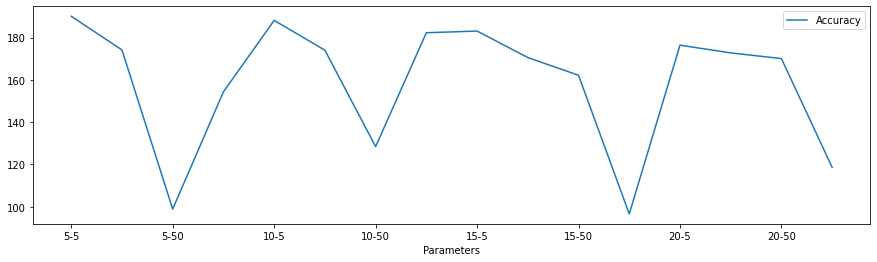

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['WINP']=y_test_orig
TestingData['WINP Predicted']=Predictions
TestingData.head()

,GP,W,L,WINP,MIN,PTS,FGM,FGA,FGP,3PM,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,POS/NEG,WINP Predicted
0,5.0,1.000000,4.000000,0.2000,48.000000,99.5,34.700000,85.800000,40.400000,12.700000,...,43.200000,21.400000,15.100000,6.700000,3.600000,4.00,19.900000,21.800000,-11.8,0.397619
1,7.0,2.666667,4.333333,0.2610,48.133333,109.9,38.466667,89.633333,42.966667,13.366667,...,42.433333,22.533333,13.433333,6.566667,4.033333,5.90,21.766667,21.766667,-8.4,0.398232
2,6.0,2.000000,4.000000,0.3145,48.350000,104.6,37.250000,85.700000,43.500000,11.200000,...,46.550000,20.250000,16.100000,5.950000,4.700000,4.85,20.650000,23.200000,-6.1,0.397519
3,5.0,1.000000,4.000000,0.2000,48.000000,115.0,44.200000,94.400000,46.800000,10.400000,...,41.200000,22.000000,10.400000,8.000000,4.000000,6.20,20.600000,19.200000,-8.4,0.398504
4,6.5,2.500000,4.000000,0.3810,48.400000,111.5,40.650000,87.600000,46.400000,13.550000,...,41.900000,21.100000,11.850000,6.050000,2.900000,4.15,21.400000,22.550000,-7.4,0.398572


In [ ]:
#Computing the absolute percent error
#APE=100*(abs(TestingData['WINP']-TestingData['WINP Predicted'])/TestingData['WINP'])
#TestingData['APE']=APE
 
#print('The Accuracy of ANN model is:', 100-np.mean(APE))
#TestingData.head()

pred_y_df=pd.DataFrame({'Actual Value': TestingData['WINP'], 'Predicted Value': TestingData['WINP Predicted'], 'Difference': TestingData['WINP']-TestingData['WINP Predicted']})
pred_y_df[0:20] #Our datapoints for our tested values.

,Actual Value,Predicted Value,Difference
0,0.200000,0.397619,-0.197619
1,0.261000,0.398232,-0.137232
2,0.314500,0.397519,-0.083019
3,0.200000,0.398504,-0.198504
4,0.381000,0.398572,-0.017572
5,0.000000,0.395440,-0.395440
6,0.391333,0.398878,-0.007544


In [ ]:
# Calculating the MSE with sklearn
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(TestingData['WINP'], TestingData['WINP Predicted'])
print("Mean Squared Error: ",mse)

rmse = math.sqrt(mse)
print("The Root Mean Squared Error: ", rmse)


Mean Squared Error:  0.03727431032142374
The Root Mean Squared Error:  0.19306555964600144


In [ ]:
# Calculating the R-Squared with sklearn
from sklearn.metrics import r2_score

r2_score = r2_score(TestingData['WINP'], TestingData['WINP Predicted'])
print(r2_score)

-1.395594020855937


In [ ]:
# Calculating the Mean Error with sklearn
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(TestingData['WINP'], TestingData['WINP Predicted'])
print("The Mean Absolute Error",mae)

rmae = math.sqrt(mae)
print("The Root Mean Absolute Error: ", rmae)

The Mean Absolute Error 0.148132883142225
The Root Mean Absolute Error:  0.3848803491245364


In [ ]:
# Calculating the Mean Percentage Error
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(TestingData['WINP'], TestingData['WINP Predicted'])
print(mape)

rmape = math.sqrt(mape)
print("The Root Mean Absolute Percentage Error: ", rmape)

254414458566363.8
The Root Mean Absolute Percentage Error:  15950374.872283217


Text(0.5, 1.0, 'Actual vs Predicted')

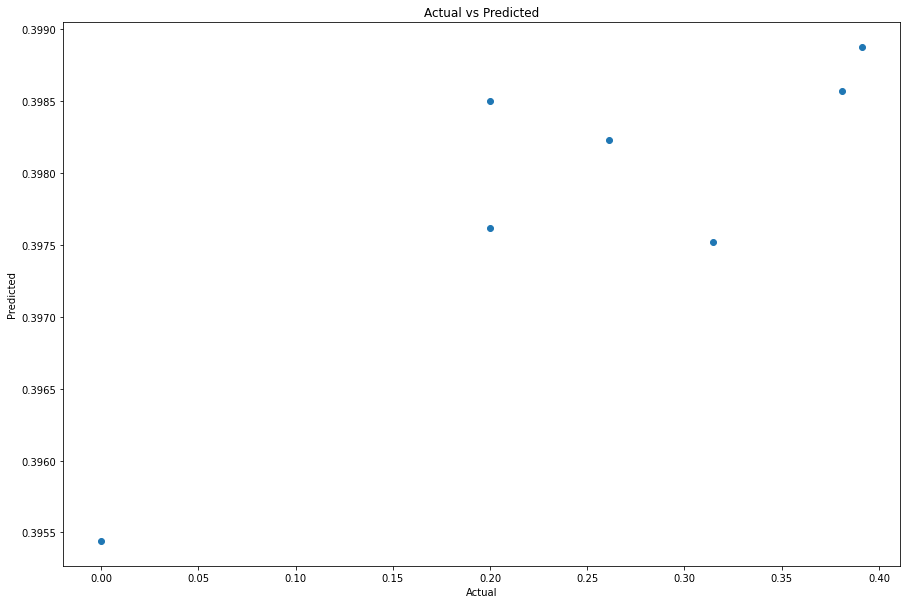

In [ ]:
#Graphing our data points.

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.scatter(TestingData['WINP'], TestingData['WINP Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
